In [669]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from pandas.tseries.offsets import DateOffset

In [18]:
file=r"C:\Users\Madhujit\Desktop\train.csv"


In [20]:
df=pd.read_csv(file)

In [22]:
df.columns=df.columns.str.lower()

In [24]:
df.columns=df.columns.str.replace(" ","_")

In [27]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [28]:
df1=df[["order_date","sales"]]

In [30]:
df1["date"]=pd.to_datetime(df1["order_date"])

C:\Users\Madhujit\AppData\Local\Temp\ipykernel_7256\4084398943.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1["date"]=pd.to_datetime(df1["order_date"])
C:\Users\Madhujit\AppData\Local\Temp\ipykernel_7256\4084398943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["date"]=pd.to_datetime(df1["order_date"])


In [33]:
df1.drop(["order_date"],axis=1,inplace=True)

C:\Users\Madhujit\AppData\Local\Temp\ipykernel_7256\2586712700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["order_date"],axis=1,inplace=True)


In [38]:
df1["month"]=df1["date"].dt.month
df1["week"]=df1["date"].dt.week

C:\Users\Madhujit\AppData\Local\Temp\ipykernel_7256\1070010265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["month"]=df1["date"].dt.month
C:\Users\Madhujit\AppData\Local\Temp\ipykernel_7256\1070010265.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1["week"]=df1["date"].dt.week
C:\Users\Madhujit\AppData\Local\Temp\ipykernel_7256\1070010265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["week"]=df1["da

In [40]:
df1["month"].unique()

array([ 8, 12, 11,  9,  4,  5,  7,  1, 10,  6,  3,  2], dtype=int64)

In [65]:
final_df=df1.groupby("date")["sales"].sum().reset_index()

In [69]:
final_df=final_df.set_index("date")

In [80]:
final_df=final_df.resample("M").sum()

<Axes: xlabel='date'>

<Figure size 1000x2000 with 0 Axes>

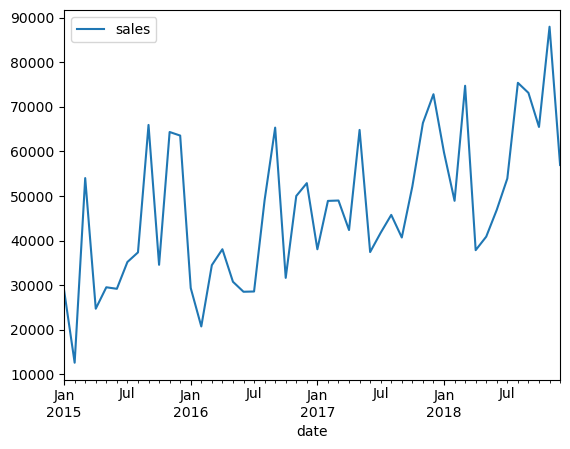

In [81]:
plt.figure(figsize=(10,20))
final_df.plot()

In [83]:
adfuller(final_df["sales"])

(-1.1450819586604928,
 0.6967631967119428,
 7,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 815.6326679643008)

In [85]:
0.6967631967119428 < 0.05 

False

In [611]:
final_df["1st_diff"]=final_df["sales"].diff()

In [612]:
adfuller(final_df["1st_diff"].dropna())

(-3.9775463921956824,
 0.0015327578233736028,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 790.3239408170763)

In [563]:
0.0015327578233736028<0.05

True

<Axes: xlabel='date'>

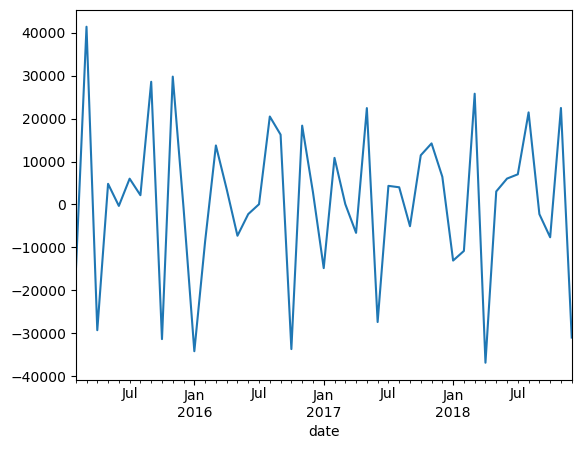

In [564]:
final_df["1st_diff"].dropna().plot()

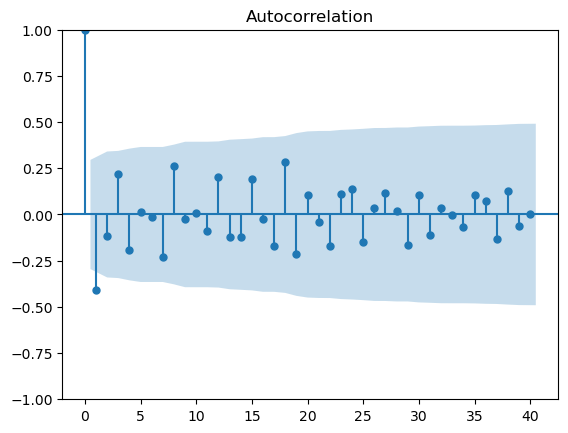

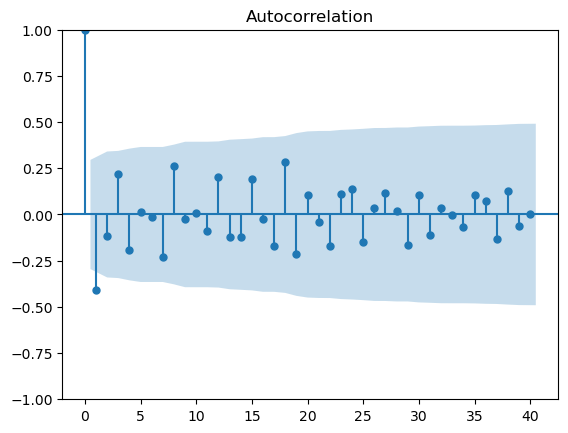

In [565]:
plot_acf(final_df["1st_diff"].iloc[4:],lags=40)


C:\Users\Madhujit\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


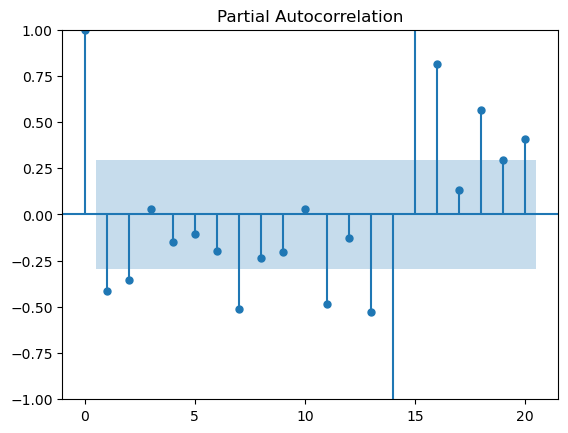

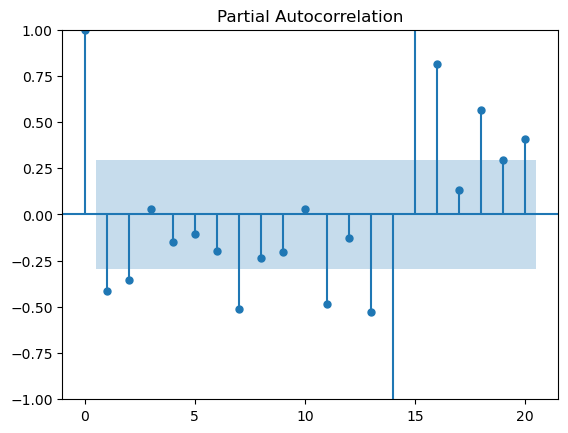

In [566]:
plot_pacf(final_df["1st_diff"].iloc[4:],lags=20)

In [662]:
model=ARIMA(final_df["sales"],order=(15,1,2))

In [663]:
result=model.fit()

C:\Users\Madhujit\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Madhujit\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [664]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   48
Model:                ARIMA(15, 1, 2)   Log Likelihood                -507.678
Date:                Sun, 25 Feb 2024   AIC                           1051.356
Time:                        12:26:06   BIC                           1084.659
Sample:                    01-31-2015   HQIC                          1063.888
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0785      0.333      0.236      0.814      -0.574       0.731
ar.L2          0.1996      0.161      1.236      0.216      -0.117       0.516
ar.L3          0.0816      0.159      0.514      0.607      -0.230       0.393
ar.L4         -0.0330      0.114     -0.289      0.772      -0.256       0.190
ar.L5         -0.1631      0.114     -1.430      0.153      -0.387       0.061
ar.L6         -0.0039      0.167     -0.023      0.981      -0.330       0.323
ar.L7         -0.3386      0.156     -2.175      0.030      -0.644      -0.033
ar.L8          0.5400      0.139      3.872      0.000       0.267       0.813
ar.L9          0.0856      0.205      0.417      0.676      -0.316       0.488
ar.L10         0.0722      0.152      0.475      0.635      -0.225       0.370
ar.L11        -0.2272      0.173     -1.315      0.188      -0.566       0.111
ar.L12         0.1365      0.197      0.692      0.489      -0.250       0.523
ar.L13         0.0705      0.180      0.391      0.696      -0.283       0.424
ar.L14        -0.0091      0.211     -0.043      0.966      -0.423       0.405
ar.L15         0.5094      0.180      2.827      0.005       0.156       0.863
ma.L1         -0.7188      0.444     -1.619      0.106      -1.589       0.152
ma.L2         -0.2701      0.427     -0.633      0.527      -1.107       0.566
sigma2      9.162e+07    4.8e-09   1.91e+16      0.000    9.16e+07    9.16e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.70
Prob(Q):                              1.00   Prob(JB):                         0.70
Heteroskedasticity (H):               0.57   Skew:                            -0.04
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.02e+32. Standard errors may be unstable.
"""

In [665]:
final_df["predict"]=result.predict(start=20,end=48)

<Axes: xlabel='date'>

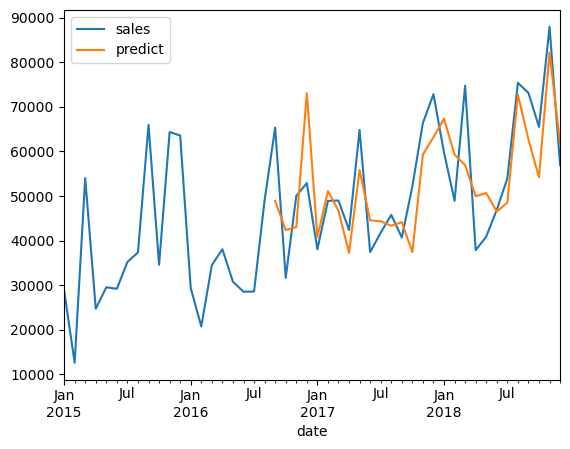

In [666]:
final_df[["sales",'predict']].plot()

In [667]:
final_df[["sales",'predict']].iloc[20:48]


,sales,predict
date,,
2016-09-30,65352.9970,48907.549248
2016-10-31,31631.8890,42352.460297
2016-11-30,50009.1450,43026.020740
2016-12-31,52891.8832,73081.748536
2017-01-31,38048.1840,40736.219721
2017-02-28,48907.5900,51099.364617
2017-03-31,48990.1410,46738.946868
2017-04-30,42368.0480,37211.199648
2017-05-31,64836.2518,55875.064742


In [668]:
mean_absolute_error(final_df["sales"][20:48],final_df["predict"][20:48])

7893.561816137911

In [672]:
futuredate=[final_df.index[-1]+DateOffset(month=x) for x in range(12)]

In [678]:
future_dates=pd.DataFrame(index=futuredate[1:],columns=final_df.columns)

In [679]:
final_dataset=pd.concat([final_df,future_dates])

In [699]:
final_dataset["forecast"]=result.predict(start=30,end=59)

<Axes: >

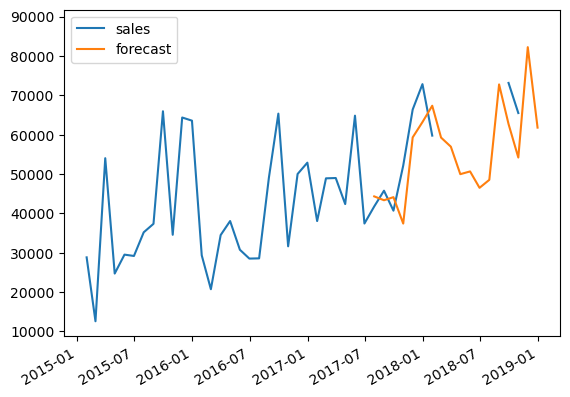

In [705]:
final_dataset[["sales","forecast"]].plot()